In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train = pd.read_csv(
    'train_dataset_train.csv.gz',
    sep=';')

test = pd.read_csv(
    'test_dataset_test.csv',
    sep=';')

In [ ]:
train[:2]

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT
0,0,A00.0,Гурьевск,8.21,young,1
1,0,A00.0,Калининград,3.20,children,1


In [ ]:
train.columns

Index(['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY',
       'PATIENT_ID_COUNT'],
      dtype='object')

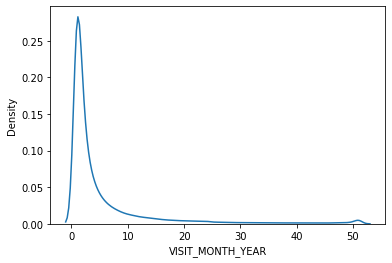

In [ ]:
sns.kdeplot(train.groupby(by=['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY']
              )['VISIT_MONTH_YEAR'].count())

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
mean_df = (train[[i.split('.')[1] != '21' for i in train['VISIT_MONTH_YEAR'].astype(str)]]
 .groupby(by=['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'])
 .agg(mean_patients=('PATIENT_ID_COUNT', 'mean'))
 .reset_index())

In [ ]:
last_val = (train[train['VISIT_MONTH_YEAR'] < 4.21]
            .sort_values(by='VISIT_MONTH_YEAR', ascending=True)
            .drop_duplicates(
                subset=['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'],
                keep='last')
            .rename(columns={'PATIENT_ID_COUNT': 'mean_patients'})
            )

last_val = (train[train['VISIT_MONTH_YEAR'] == 3.21]
            .rename(columns={'PATIENT_ID_COUNT': 'mean_patients'})
            )

In [ ]:
r2_score(train[train['VISIT_MONTH_YEAR']==4.21]['PATIENT_ID_COUNT'], 
         train[train['VISIT_MONTH_YEAR']==4.21].merge(
             ast_val[['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY','mean_patients']], how='left').fillna(0)['mean_patients'])

0.8912246376349479

In [ ]:
sample = pd.read_csv(
    'sample_solution.csv',
    sep=';')

In [ ]:
march_val = train[train['VISIT_MONTH_YEAR'] == 3.22]

In [ ]:
res = (test
 .merge(
     march_val[['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY', 'PATIENT_ID_COUNT']], 
     how='left')
 .fillna(0))

In [ ]:
res['PATIENT_ID_COUNT'] = res['PATIENT_ID_COUNT'].astype(int)
res['VISIT_MONTH_YEAR'] = '04.22'

In [ ]:
res.to_csv('baseline.csv', 
           index=False,
           sep=';')

In [ ]:
len(res), len(sample)

(39373, 39373)